In [28]:
import yfinance as yf
import polars as pl
import pandas as pd

In [33]:
from pathlib import Path
p = Path().resolve().parents[0] / 'data' / 'raw_bin_samples' / 'clean.arrow'
lf = pl.scan_ipc(p)

In [66]:
symbols = lf.select(pl.col('symbol').unique()).collect().to_pandas()['symbol']
start = '2019-01-01'
end = '2019-12-27'

yf_df = yf.download(list(symbols), start=start, end=end, actions=True)

[*********************100%%**********************]  49 of 49 completed

6 Failed downloads:
['ABMD', 'ANTM', 'AGN', 'ALXN', 'ADS', 'ABC']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


In [70]:
yf_df['Dividends'].max()

Ticker
A       0.164000
AAL     0.100000
AAP     0.060000
AAPL    0.192500
ABBV    1.070000
ABT     0.320000
ACN     1.460000
ADBE    0.000000
ADI     0.540000
ADM     0.350000
ADP     0.910000
ADSK    0.000000
AEE     0.495000
AEP     0.700000
AES     0.137000
AFL     0.270000
AIG     0.320000
AIV     0.051993
AIZ     0.630000
AJG     0.430000
AKAM    0.000000
ALB     0.368000
ALGN    0.000000
ALK     0.350000
ALL     0.500000
ALLE    0.270000
AMAT    0.210000
AMD     0.000000
AME     0.140000
AMG     0.320000
AMGN    1.450000
AMP     0.970000
AMT     1.010000
AMZN    0.000000
ANET    0.000000
ANSS    0.000000
AON     0.440000
AOS     0.240000
APA     0.250000
APD     1.160000
APH     0.062500
APTV    0.220000
ARE     1.000000
dtype: float64

In [50]:
df = lf.collect()

In [54]:
df = df.group_by(['symbol', pl.col('timestamp').dt.date()], maintain_order=True).agg(pl.col('price').first())

In [62]:
def test(subdf):
	print(subdf)

df.to_pandas().groupby('symbol').apply(test)

     symbol  timestamp   price
8750      A 2019-01-02  66.220
8751      A 2019-01-03  65.750
8752      A 2019-01-04  64.080
8753      A 2019-01-07  65.500
8754      A 2019-01-08  67.420
...     ...        ...     ...
8995      A 2019-12-20  85.135
8996      A 2019-12-23  85.350
8997      A 2019-12-24  85.285
8998      A 2019-12-26  85.115
8999      A 2019-12-27  85.620

[250 rows x 3 columns]
     symbol  timestamp   price
9000    AAL 2019-01-02  31.525
9001    AAL 2019-01-03  31.770
9002    AAL 2019-01-04  30.420
9003    AAL 2019-01-07  31.995
9004    AAL 2019-01-08  33.375
...     ...        ...     ...
9245    AAL 2019-12-20  28.640
9246    AAL 2019-12-23  29.300
9247    AAL 2019-12-24  29.330
9248    AAL 2019-12-26  29.265
9249    AAL 2019-12-27  29.770

[250 rows x 3 columns]
     symbol  timestamp    price
9250    AAP 2019-01-02  156.695
9251    AAP 2019-01-03  157.790
9252    AAP 2019-01-04  165.125
9253    AAP 2019-01-07  161.345
9254    AAP 2019-01-08  162.765
...     ...     

C:\Users\lachl\AppData\Local\Temp\ipykernel_75032\1802022881.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.to_pandas().groupby('symbol').apply(test)
C:\Users\lachl\AppData\Local\Temp\ipykernel_75032\1802022881.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.to_pandas().groupby('symbol').apply(test)


""


In [55]:
import matplotlib.pyplot as plt

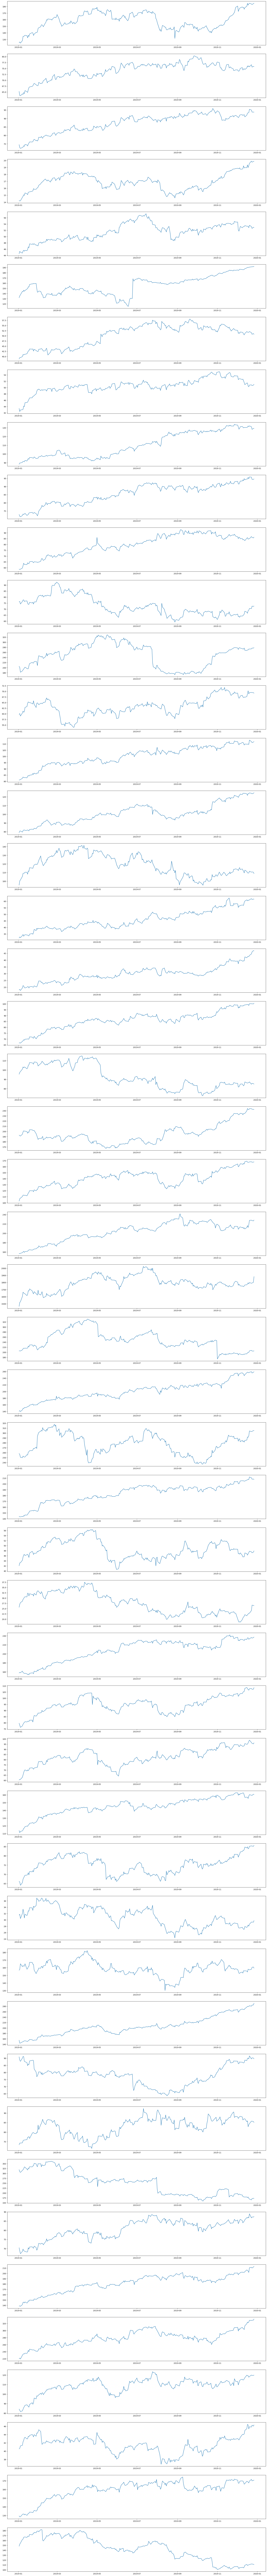

In [65]:
fig, ax = plt.subplots(49, 1, figsize=(25, 250))

ddf = df.to_pandas()

for i, symbol in enumerate(ddf['symbol'].unique()):
	subdf = ddf[ddf['symbol'] == symbol]
	ax[i].plot(subdf['timestamp'], subdf['price'])